# Lecture pandas basics

- Two big data structures
- pandas.Series
- pandas.DataFrame
- read.csv
- indexing
- plotting

## pandas series

- can create from dictionary 
- can create from list 
- can create from np.array

In [1]:
import pandas as pd

programs_dict = dict(AI = 25, NET = 38, Java = 30, UX = 28)

programs_series = pd.Series(programs_dict) 

programs_series

AI      25
NET     38
Java    30
UX      28
dtype: int64

In [2]:
# extract values through indexing
print(f"{programs_series[0] = }")
print(f"{programs_series[-1] = }")

# get keys
print(f"{programs_series.keys() = }")
print(f"{programs_series.keys()[0] = }")

programs_series[0] = 25
programs_series[-1] = 28
programs_series.keys() = Index(['AI', 'NET', 'Java', 'UX'], dtype='object')
programs_series.keys()[0] = 'AI'


In [3]:
import random as rnd

rnd.seed(1337)

dice_series = pd.Series([rnd.randint(1, 6) for _ in range(10)])
dice_series.head() # shows the first 5 (by default) rows in a series


0    5
1    5
2    6
3    3
4    5
dtype: int64

In [4]:
print(f"{dice_series.min()}") #shows the lowest value in the series
print(f"{dice_series.argmin()}") #shows the index associated to the lowest value in the series
print(f"{dice_series.max()}") # displays max value in series
print(f"{dice_series.mean()}") # displays average value of the sereis
print(f"{dice_series.median()}") # sorts all values in order, picks the middle value

2
7
6
4.4
5.0


## Dataframe

- tabular data with rows and columns
- analog to 2D numpy arrays with flexible row indices and col names
- specialized dictionary with ol name mapped to a series object

In [5]:
# created a dataframe from a Series object
df_programs = pd.DataFrame(programs_series, columns = ("Number of students",))
df_programs

,Number of students
AI,25
NET,38
Java,30
UX,28


In [6]:
# create 2 series objects
students = pd.Series({"AI": 25, "NET": 38, "Java": 30, "UX": 28})
skills = pd.Series({"AI": "Python", "NET": "C#", "UX": "Figma", "Java": "Java"})

# create a DataFrame from 2 Series objects
df_program = pd.DataFrame({"Students": students, "Skills": skills})
df_program

,Students,Skills
AI,25,Python
Java,30,Java
NET,38,C#
UX,28,Figma


In [11]:
df_program["Skills"]


AI      Python
Java      Java
NET         C#
UX       Figma
Name: Skills, dtype: object

In [13]:
df_program["Skills"][0], df_program["Skills"]["AI"]

('Python', 'Python')

## Indexers

- loc - slicing and indexing using explicit index (the label)
- iloc - slicing and indexing using python style indexing 

In [15]:
df_program.loc["AI"] #access the entire row of "AI"

Students        25
Skills      Python
Name: AI, dtype: object

In [17]:
df_program.loc["Java"] #access the entire row of "Java" - series object

Students      30
Skills      Java
Name: Java, dtype: object

In [18]:
df_program.iloc[1:4] #used to take out rows(index), in example row 1 - 4 - dataframe object

,Students,Skills
Java,30,Java
NET,38,C#
UX,28,Figma


## Masking

- uses bool to extract value

In [20]:
df_program

,Students,Skills
AI,25,Python
Java,30,Java
NET,38,C#
UX,28,Figma


In [25]:
df_program["Students"] >= 30 #example of masking

AI      False
Java     True
NET      True
UX      False
Name: Students, dtype: bool

In [26]:
#using masking to filter the dataframe 
df_program[df_program["Students"] >= 30] 

,Students,Skills
Java,30,Java
NET,38,C#


## Excel data




In [30]:
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_excel("../Data/calories.xlsx")
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [32]:
df.shape

(2225, 5)

In [34]:
df["FoodCategory"].unique() #checks for unique values in column

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [36]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning and explorations

- type convert string object to with numerical values to int
- change column names
- seperate into liquids and  solids

In [38]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [42]:
# renaming columns, rows are axis 0 and columns axis 1. This defetmins which axis you want to rename
df = df.rename(dict(Cals_per100grams = "Calories", KJ_per100grams = "KJ", per100grams = "per100"), axis=1)

In [43]:
df.head()

,FoodCategory,FoodItem,per100,Calories,KJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [76]:
df["Calories"] = df["Calories"].str[:-3].astype(int) #.str[:-3] deletes the 3 letters cal .astype(int) converts str object to int
df.head()

,FoodCategory,FoodItem,per100,Calories,KJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [77]:
df["per100"].value_counts() # counts the frequency of each unique elememts

100g     1802
100ml     423
Name: per100, dtype: int64

In [78]:
(df["per100"] == "100g").value_counts() 

True     1802
False     423
Name: per100, dtype: int64

In [79]:
# seperate liquids and solids
# filter out all solids
df_solids = df[df["per100"] == "100g"] #used masking 
# filter out all liquids
df_liquids = df[df["per100"] == "100ml"] # used masking



In [80]:
df_liquids.head()

,FoodCategory,FoodItem,per100,Calories,KJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


In [81]:
df_solids.head()

,FoodCategory,FoodItem,per100,Calories,KJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [82]:
# check that we only have 100g in per100 column
df_solids["per100"].value_counts()

100g    1802
Name: per100, dtype: int64

## assignment: 

- find the most colory rich solids
- find the most colory rich liquids

In [85]:
df_solids.sort_values(by = "Calories") #sorts from low to high in "Calories" column 

,FoodCategory,FoodItem,per100,Calories,KJ
1816,BakingIngredients,Baking Soda,100g,0,0 kJ
2043,Herbs&Spices,Stevia,100g,0,0 kJ
2004,Herbs&Spices,Garlic Salt,100g,0,0 kJ
2040,Herbs&Spices,Sea Salt,100g,0,0 kJ
2038,Herbs&Spices,Salt,100g,0,0 kJ
...,...,...,...,...,...
675,Pork,Lard,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ


In [88]:
# ascending = False --> sorts high to low
solids_sorted_calories = df_solids.sort_values(by = "Calories", ascending = False) 
solids_sorted_calories.iloc[:10] # displays 10 most calory rich solid foods

,FoodCategory,FoodItem,per100,Calories,KJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
675,Pork,Lard,100g,898,3772 kJ
1897,BakingIngredients,Vegetable Oil,100g,884,3713 kJ
1898,BakingIngredients,Vegetable Shortening,100g,884,3713 kJ
527,Beef&Veal,Beef Suet,100g,854,3587 kJ
1768,Oils&Fats,Real Butter,100g,720,3024 kJ


In [111]:
solids_top5_calories = solids_sorted_calories.head()
solids_top5_calories

,FoodCategory,FoodItem,per100,Calories,KJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [113]:
liquids_top5_calories = df_liquids.sort_values(by = "Calories", ascending = False).head()
liquids_top5_calories


,FoodCategory,FoodItem,per100,Calories,KJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


In [114]:
# top 5 food categories by calories
df["FoodCategory"].value_counts() #gives an overlook

#.groupby gupperar värden. .meadian() tar fram mendian värdet i denna grupp
# Därefter sorteras datan --> top 5 matkategorier med högst kalorivärden
top5_category_median = df.groupby("FoodCategory").median("Calories").sort_values(by="Calories", ascending = False).head().reset_index()
top5_category_median

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


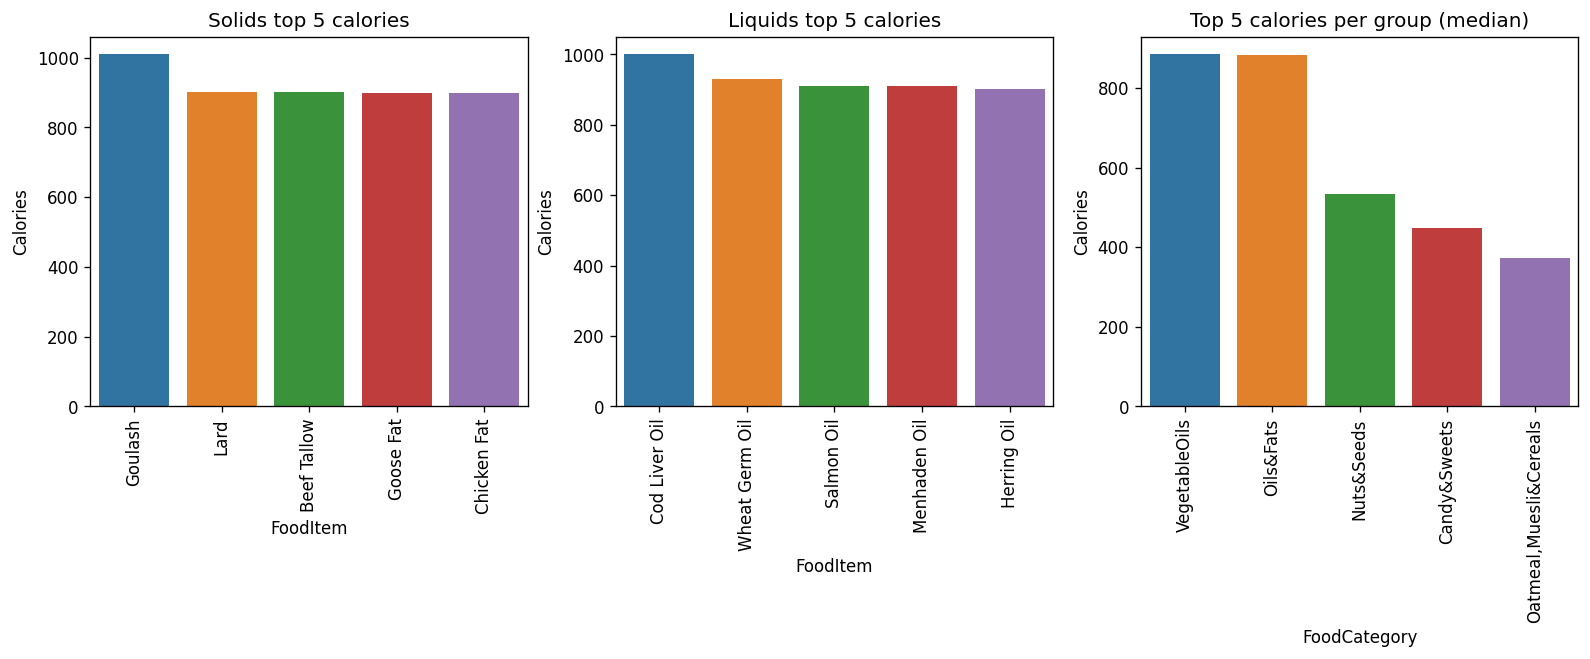

In [122]:
fig, axes = plt.subplots(1,3, figsize = (16,4), dpi = (120)) # 1,3 creates 3 subplots, fidsize sets size 

titles = ["Solids top 5 calories", "Liquids top 5 calories", "Top 5 calories per group (median)"]
data_frames = (solids_top5_calories, liquids_top5_calories, top5_category_median) # the dataframes we want to plot
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]


for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x = x_columns[i], y = "Calories", ax = axes[i] ) #sns plockar in data (står för seaborn iom att vi importera det som sns)
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)

plt.savefig("../Code-alongs/Figurer/top_calories_plot.png") #sparar ploten i png format